## Arbres de décision

### Arbre de décision : Quésaco ? <a class="anchor" id="def"></a>

Un arbre de décision est un modèle d'apprentissage supervisé simple.  <br>

Les arbres de décision, plus précisémment les forêts aléatoires (Random Forest), sont largement utilisées en entreprise pour faciliter le processus de prise de décision et l'analyse des risques.  Leur structure arborescente les rend lisibles par un être humain, contrairement à d'autres modèles où le prédicteur construit une "boite noire".

---

### Types d'arbre de décision <a class="anchor" id="types"></a>

Il existe deux arbres de décision :

* **Arbres de régression (Regression Tree)**: <br> 
Ils sont utilisés pour répondre à des problèmes de régression où la valeur de sortie (target ou variable explicative) est une variable continue. Pour prédire cette variable, l'étiquette de chaque feuille de l'arbre est la moyenne des valeurs. 
* **Arbres de classification (Classification Tree)**<br>
Ils sont utilisés pour répondre à des problèmes de classification où la valeur de sortie est une variable catégorielle. 


---

### Implémentation avec sklearn <a class="anchor" id="code_exemple"></a>

Un modèle de classification avec des arbres de décision peut être implémenté avec la classe <a https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier">DecisionTreeClassifier</a> du package *sklearn.tree*<br>


#### Librairies 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#### Jeu de données
**Question 1** : <br>
Charger le jeu de données <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.breast_cancer.html?highlight=diabetes#sklearn.datasets.breast_cancer">breast_cancer</a> de sklearn 
* Utiliser la fonction *load_breast_cancer()* du package *sklearn.datasets*
* Affecter les features à la variable X
* Affecter la target à la variable y
* Afficher la description du jeu de données en utilisant l'attribut *DESCR* du dictionnaire data. 

In [3]:
from sklearn.datasets import load_breast_cancer

breast= load_breast_cancer()
X,y= breast.data,breast.target
print(breast.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### Données d'entraînement et de test
**Question 2** :<br>
Diviser le jeu de données en jeu de données d'entraînement (70%) et de test (30%) en utilisant la fonction *train_test_split* du package *sklearn.model_selection* 
* paramètres : random_state = 0

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

**Question 3** :<br>
Comment le paramètre *random_state* influence le split du dataset ? <br>
**Ressources** 
<a href="https://www.bitdegree.org/learn/train-test-split">Splitting Datasets With the Sklearn train_test_split Function</a>

Il permet de randomiser l'échantillon, le mettre a une valeur fixe nous permets de toujours avoir le meme split sur le dataset

#### Modèle | DecisionTreeClassifier
**Question 4** :<br>
Créer l'objet *classifier* de la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">*DecisionTreeClassifier*</a> du package *sklearn.tree*. <br>
Utiliser les paramètres par défaut.

In [5]:
from sklearn import tree 

classifier=tree.DecisionTreeClassifier()


#### Entraînement du l'arbre de décision

**Question 5** : <br>Utiliser la méthode *fit* de la classe *DecisionTreeClassifier* pour entraîner le modèle d'arbre de classification *classifier* en utilisant les données d'entraînement *X_train* et *y_train* (algorithme supervisé)

In [6]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

#### Prédiction
**Question 6** : <br>
Prédire si un patient a une tumeur maligne ou bénine en utilisant le modèle entraîné précédemment et la méthode *predict* de la classe *DecisionTreeClassifier* avec comme paramètre les données de test *y_test*.<br>
Stocker le résultat de la prédiction dans la variable y_pred

In [7]:
y_pred=classifier.predict(X_test)

comparison= y_pred=y_test
wesh= comparison.all()

print(wesh)

False


#### Visualisation de l'arbre de décision
Il existe plusieurs manière pour visualiser l'arbre de décision pour une meilleure lisibilité et interprétation du modèle. <br>
Ressource : <a href="https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc">*Visualizing DEcision Trees with Python (Scikit-lean, Graphiz, Matplotlib*</a>

**Question 7** : <br>
Visualiser le modèle *classifier* en utilisant <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree">*plot_tree*</a> du package *skleran.tree*

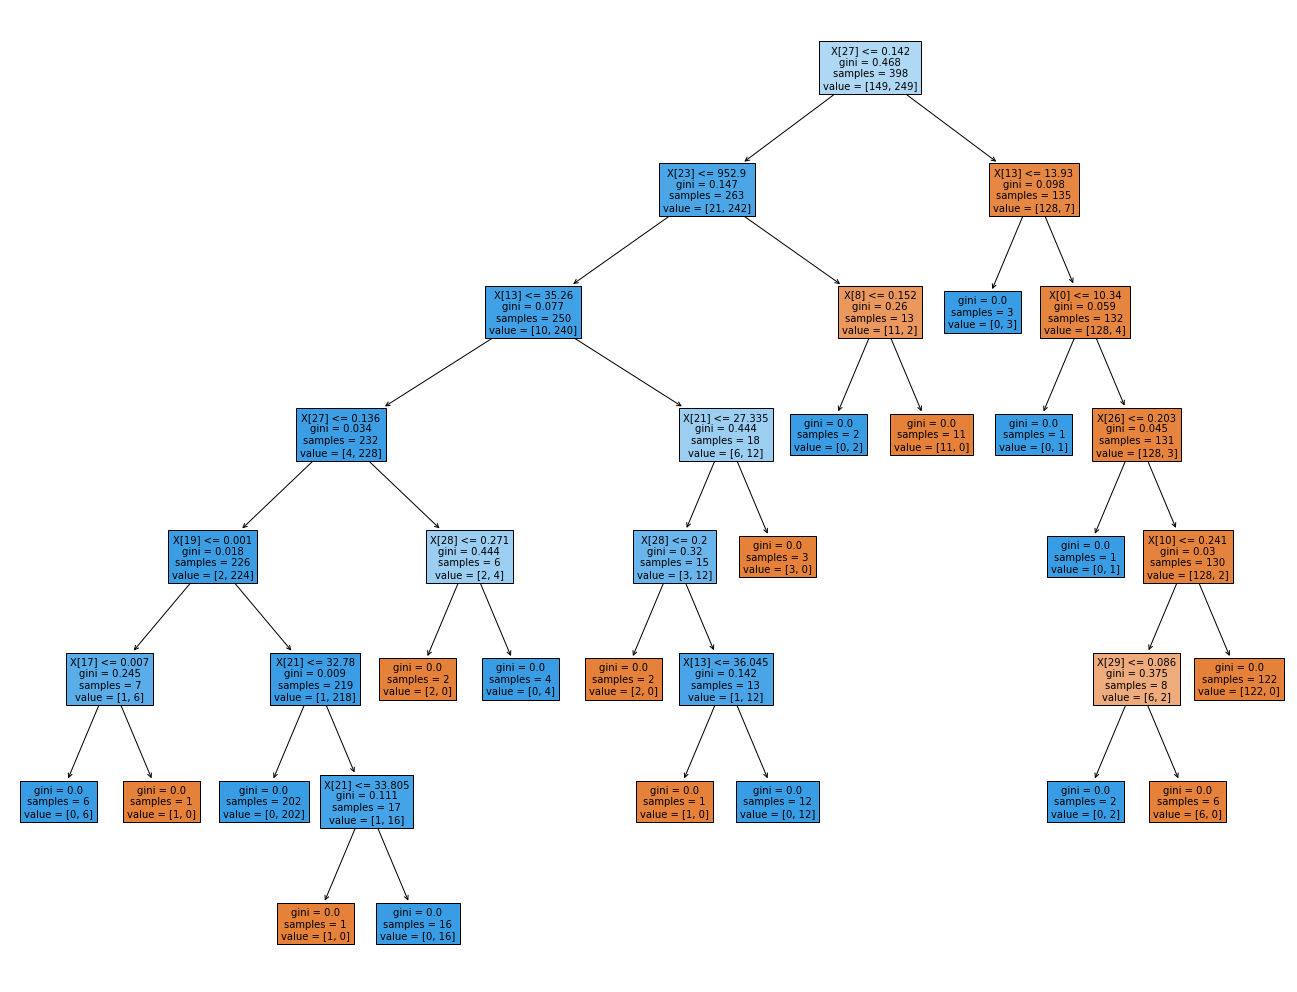

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(23,18))

tree.plot_tree(classifier,fontsize=10,filled=True)

plt.show()

**Question 8** : <br>
Visualiser le modèle classifier en utilisant<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz">*Graphiz*</a> <br>
Intaller le package <a href="https://anaconda.org/conda-forge/python-graphviz">*Graphiz*</a> 

In [9]:
import graphviz
tree.export_graphviz(classifier, out_file="tree.dot")

**Question 9** :<br>
L'arbre généré est-il exploitable ? <br>
Conclure !

A premiere vue le le graph nous montres un arbre complexe qui a besoin de beacoup de specificité pour trouvé les sorties il y a beaucoup de noeud et la plus part des feuilles represente des sorties trop precise notre modele ne generalise pas assez, a preliere vue il est surentrainée 

#### Evaluation 
**Question 10** : <br>
Evaluer la qualité du modèle en utilisant la méthode *score* de la classe *DecisionTreeClassifier* pour les données d'entraînement et de test. 

#### Intérpretation  


**Question 11** :<br> 
A quoi correspond le critère d'évaluation utilisé pour le calcul du score ? 

**Question 12** :<br>
Comparez les deux scores et conclure !

Fin première partie <br>
--- 

### Algorithmes de construction des arbres de décision<a class="anchor" id="algos"></a>

**Question 14** : <br>
* Citer les différents algorithmes d'arbres de décision. 
* Quel est l'algorithme implémenté dans scikit learn ? 
**Ressource** : <br>
<a href="https://scikit-learn.org/stable/modules/tree.html#">Decision Trees - Scikit Learn</a>


* **ID3 Iterative Dichotomiser 3** <br>
 
* **C4.5** <br>

* **C5.0** <br>

* **CART Classification And Regression Trees** <br>




### Exemple <a class="anchor" id="exemple"></a> <br>
Pour mieux comprendre comment l'arbre de décision est construit, un exemple est détaillé <a href="https://www.saedsayad.com/decision_tree_reg.htm#:~:text=Decision%20tree%20builds%20regression%20or,decision%20nodes%20and%20leaf%20nodes">ici</a>. <br>
L'exemple utilise l'algorithme ID3, qui est la base de CART utilisé par scikit learn. 

**Question 15**: <br>
En utilisant l'arbre de décision de l'exemple précédent, prédire le nombre d'heures jouées dans les conditions suivantes : [Outlook = Sunny,Temp = Mild ,Humidity = High, Windy = False] ?

heures jouées prédites = ... <br>
heures jouées réeels = ...

Fin deuxième partie <br>
---

### Application : prédire le type d'Iris <a class="anchor" id="boston"></a>

#### Jeu de données 
**Question 16** : <br>
Charger le jeu de données <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html?highlight=boston#sklearn.datasets.load_boston">boston house-prices</a> de sklearn <br>
Tips : 
* Utiliser la fonction *load_boston()* du package *sklearn.datasets*. Le résultat est affecté à la variable *dataset*
* Afficher la description du jeu de données en utilisant l'attribut *DESCR* du dictionnaire data. 
* Transformer le *dataset* à un DataFrame, *df*, en utilisant *pandas* et les attributs *data* et *feature_names* du dictionnaire *data*
* Créer une variable $X$ qui représente les variables explicatives. Pour cet exemple, on se limite aux variables 'RM', 'LSTAT' et 'PTRATIO'
* Créer une variable $y$ qui contient la variable expliquée (target)

#### Données d'entraînement et de test
**Question 17** : <br>
Quel est l'avantage de diviser le jeu de données en données d'apprentissage et des données de test ? 

**Question 18** :<br>
Diviser le jeu de données en jeu de données d'entraînement (80%) et de test (20%) en utilisant la fonction *train_test_split* du package *sklearn.model_selection* 
* paramètres : random_state = 42


**Question 19** :<br>
Quelle est la limite de la métode train_test_split sur la précision ? comment pallier à cette limite ? <br>
**Tips :** <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold">K-Folds cross-validation</a>, <a href="https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search">Grid Search</a> <br>

**Ressources**
* <a href="https://scikit-learn.org/stable/modules/cross_validation.html?highlight=cross_validation">Cross-validation scikit learn</a>
* <a href="https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85">Cross Validation Explained: Evaluating estimator performance.</a>
* <a href="http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/wines_knn_cross_val.html">Validation croisée</a>


#### Modèle | DecisionTreeClassifier
**Question 20** : <br>
Utiliser la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeClassifier">*DecisionTreeClassifier*</a> du package *sklearn.tree* pour créer l'objet *classifier*<br>
Utiliser les paramètres par défaut.

**Question 21** :<br> Quels sont les paramètres de la classe *DecisionTreeClassifier* qui influencent la performance de l'algorithme ?  <br>
**Ressources** <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeClassifier">DecisionTreeClassifier</a> <br>
<a href="https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3">InDepth : Parameter tuning for Decision Tree (classification)</a>

Les paramètres à optimiser pour un arbre de décision optimal sont les suivants : 
* 
*
*



**Question 22** :  <br>
Créer les deux sous-ensemble de données d'apprentissage et de test en utilisant la technique de validation croisée. <br>
Stocker le résultat dans la variable *cv_sets*. <br>
Utiliser les paramètres suivants :
* $n\_splits$ = $10$
* $shuffle$ = $True$ 
* $random\_state$ = $42$ <br>
Tips : Utiliser la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold">*KFold*</a> du package *sklearn.model-selection*

**NB** : Dans ce qui suit, on se focalisera sur le premier paramètre, à savoir, **max_depth**. Le même raisonnement peut être appliqué à chacun des paramètres ou à une combinaison de paramètres. 

#### Entraînement de l'arbre de décision 

##### Optimisation du paramètre max_depth
Pour trouver la valeur du paramètre max_depth qui donne le meilleur estimateur (meilleur arbre de décision), on utilise la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV">GridSearchCV</a>. <br>
Pour cela, il faut suivre les étapes suivantes !

**Question 23** : <br>
Créer un dictionnaire pour *max_depth* avec les valeurs de 1 à 10. <br>
Affecter-le à la variable *params*

**Question 24** : <br>
Créer un objet grid search en utilisant la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV">*GridSearchCV*</a> du package *sklearn.model_selection*
* paramètres : classifier, params, score="accuracy", cv_sets
* variable : grid_cv

**Question 25** :<br>
Entraîner le méta estimateur grid_cv pour trouver l'estimateur optimal en utilisant la méthode *fit*. <br>

**Question 26** : <br>
Quel est le meilleur modèle ? <br>
Stocker le meilleur modèle dans la variable *best_tree*<br>
**Tips** : Utiliser l'attribut *best_estimator_*

**Question 27** : <br>
Quelle est la profondeur maximale (*max_depth*) du modèle optimal (best_tree) ? <br>
**Tips** : Utiliser l'attribut *best_params_* de la classe *GridSearchCV*

#### Prédiction

**Question 30** : <br>
Prédire le type d'Iris pour les données de test *X_test*


#### Intérpretation  


**Question 31** : <br>
Intérpreter les résultats (la prédiction semble logique ?)

Fin troisième partie 
---

##### Courbe d'apprentissage

**Question 32** : <br>
Qu'est ce que la courbre d'apprentissage ? <br>
**Ressource** : <a href="https://fr.qaz.wiki/wiki/Learning_curve_(machine_learning)">Courbe d'apprentissage</a>

**Question 33** :<br>
Afficher la **courbe d'apprentissage** du classifier en utilisant la méthode *plot_learning_curve* du module *estimators* de scikit plot

**Question 34** : <br>
Interpréter les graphiques 

### Pour aller plus loin : <a class="anchor" id="post_pruning"></a>
<a href="https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py">Post élagage avec scikit learn | Exemple </a>